In [1]:
import tensorflow.keras as ks
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.utils import shuffle
from tensorflow.keras import backend as K

In [3]:
full_data = np.genfromtxt('V_data.csv', delimiter= ',', skip_header=1)

In [6]:
training_set = full_data[:,:7]
training_targets = full_data[:,8]

##normalizing data
mean = training_set.mean(axis=0)
training_set -= mean
std = training_set.std(axis=0)
training_set /= std

print(training_set, training_targets)

[[-8.50962943e-01 -4.34580412e-01 -6.53988013e-01  1.16074088e+00
  -7.27281869e-01  6.27616501e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01 -1.78986881e+00  2.32223605e-01
  -1.66419963e-01  4.29720914e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01  2.96713472e-01 -6.89307328e-01
   6.54281089e-01  7.59179351e-01  3.91869977e-01]
 [-8.50962943e-01  2.21759687e+00  1.00737929e+00  6.67178627e-03
   6.33915746e-01  1.30574869e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01  2.04110580e-01  2.67422727e-01
   3.74403961e-01  3.34007882e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01  8.41044395e-01  3.69623630e-01
   4.87479726e-01 -8.68240895e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01  6.02773306e-01 -9.75192922e-01
   3.83765168e-01 -3.61107997e-01  3.91869977e-01]
 [-8.50962943e-01 -4.34580412e-01 -2.19690599e-01 -1.83217262e+00
   3.12573131e-01 -2.10118335e-01 -2.45083625e+00]
 [-8.50962943e-01 -4.34580412e-01  1.08537848e+00  1.74175804e-0

In [7]:
avg_scores = []
epochs = []
avg_scores.clear()
epochs.clear()

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(training_set.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
I = 5
k = 5
num_val_samples = len(training_set) // k
num_epocs = 0
all_scores = np.zeros((I,k))

## epochs
for l in range(0, 500, 10):
    print(l)
    num_epochs = l
    
    ## iterations
    for i in range(I):
    
        ##shuffle
        training_set, training_targets = shuffle(training_set,
                                             training_targets)
        epochs.append(num_epochs)
        ##kfold
        for j in range(k):
            print('processing itteration #', i, 'fold #', j)
            ##preping validation data from partition k
            val_data = training_set[i * num_val_samples: (i + 1) * num_val_samples]
            val_targets = training_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
            ##preping training data
            partial_training_data = np.concatenate(
                [training_set[:i * num_val_samples],
                 training_set[(i + 1) * num_val_samples:]],
                axis=0)
            partial_training_targets = np.concatenate(
                [training_targets[:i * num_val_samples],
                training_targets[(i + 1) * num_val_samples:]],
                axis=0)
            ##building model
            model = build_model()
            ##training
            model.fit(partial_training_data, partial_training_targets, epochs=num_epochs, 
                     batch_size=1, verbose=0)
            ##eval model
            val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
            all_scores[i,j] = val_mae
        
   
    avg_scores.append(np.mean(all_scores))
    K.clear_session()

0
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
10
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itte

processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
100
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itter

processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
190
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itter

processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
290
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itter

processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
380
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itter

processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itteration # 4 fold # 2
processing itteration # 4 fold # 3
processing itteration # 4 fold # 4
470
processing itteration # 0 fold # 0
processing itteration # 0 fold # 1
processing itteration # 0 fold # 2
processing itteration # 0 fold # 3
processing itteration # 0 fold # 4
processing itteration # 1 fold # 0
processing itteration # 1 fold # 1
processing itteration # 1 fold # 2
processing itteration # 1 fold # 3
processing itteration # 1 fold # 4
processing itteration # 2 fold # 0
processing itteration # 2 fold # 1
processing itteration # 2 fold # 2
processing itteration # 2 fold # 3
processing itteration # 2 fold # 4
processing itteration # 3 fold # 0
processing itteration # 3 fold # 1
processing itteration # 3 fold # 2
processing itteration # 3 fold # 3
processing itteration # 3 fold # 4
processing itteration # 4 fold # 0
processing itteration # 4 fold # 1
processing itter

In [11]:
import matplotlib.pyplot as plt

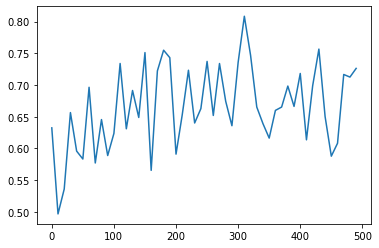

In [16]:
plt.figure()
plt.plot(range(0, 500, 10), avg_scores)

In [17]:
np.savetxt("V_scores", avg_scores, delimiter=',')

In [18]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [19]:
sm_score = smooth_curve(avg_scores)

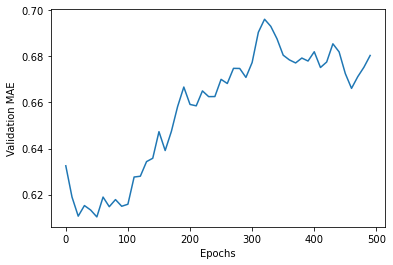

In [22]:
plt.figure()
plt.plot(range(0, 500, 10), sm_score)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.savefig('V_epoch.png', dpi=600)